<a href="https://colab.research.google.com/github/anishdevadiga/Machine_Learning/blob/main/multiLinearRegresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mean Squared Error (MSE): 4.310496043268573
R-squared (R²): -0.2473866974527208
Sum of Squared Errors (SSE): 56.03644856249145
Total Sum of Squares (SST): 44.92307692307693
Regression Sum of Squares (SSR): -11.113371639414524

Actual vs Predicted
     Actual  Predicted
0        2   1.714921
1        3   3.903445
2        1  -2.321769
3        1   0.891133
4        1   0.914681
5        4   6.617029
6        4   1.936915
7        4   6.694167
8        4   2.927537
9        2   1.843634
10       2   1.871346
11       4   8.877539
12       8   8.860481


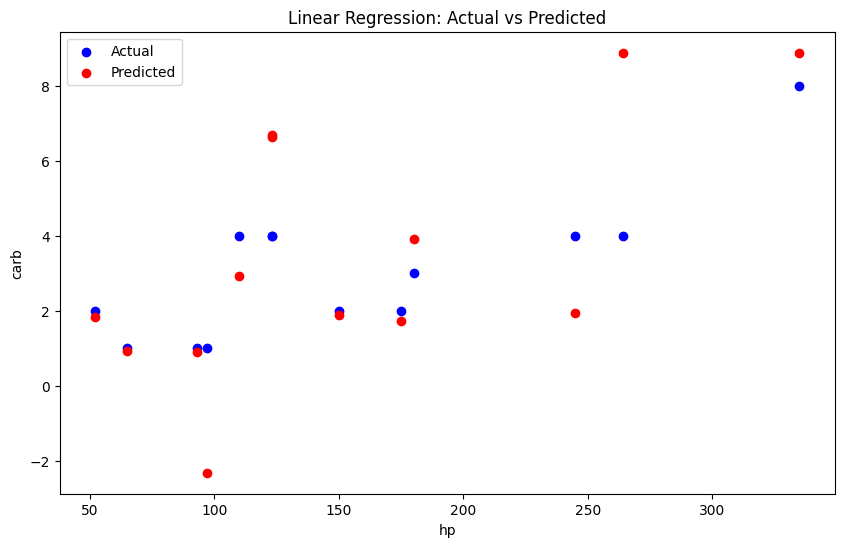

In [7]:
#mtcars dataset
mtcars = pd.read_csv("/content/drive/My Drive/mtcars.csv")

# Prepare the features and target variable
X_mtcars = mtcars[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear']].values
y_mtcars = mtcars['carb'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_mtcars, y_mtcars, test_size=0.4, random_state=55)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
sse = mse * len(y_test)
sst = np.sum((y_test - np.mean(y_test))**2)
ssr = sst - sse

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Sum of Squared Errors (SSE):", sse)
print("Total Sum of Squares (SST):", sst)
print("Regression Sum of Squares (SSR):", ssr)

# Prepare the results for visualization
resultDataSet = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted\n", resultDataSet)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_test, color='blue', label='Actual')  # 'hp' is the 3rd column (index 2)
plt.scatter(X_test[:, 2], y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('hp')
plt.ylabel('carb')
plt.legend()
plt.show()


Accuracy : - 0.5278909357356787


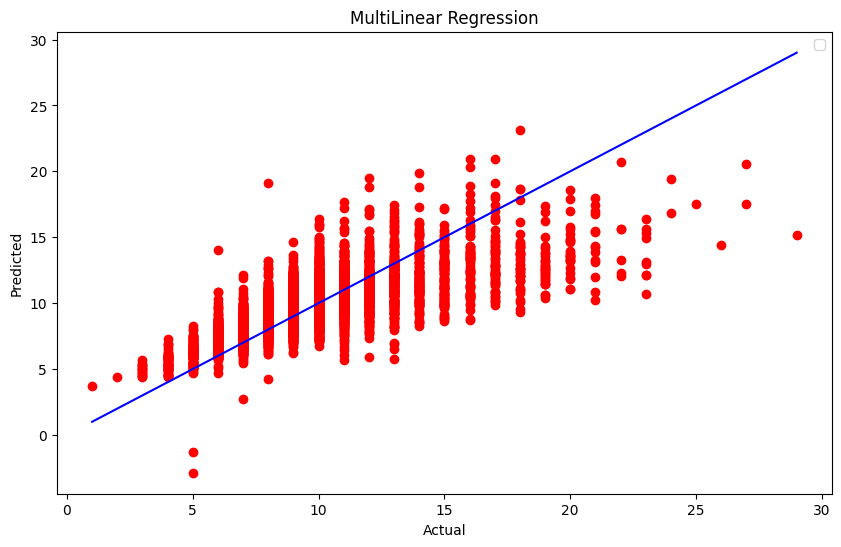

In [ ]:
#abalone dataset
from sklearn.preprocessing import LabelEncoder
abalone=pd.read_csv("/content/drive/My Drive/abalone.csv")

label_encoder=LabelEncoder()
abalone['Sex']=label_encoder.fit_transform(abalone['Sex'])
X_abalone=abalone[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']].values
y_abalone=abalone['Rings'].values

model_abalone=LinearRegression()
model_abalone.fit(X_abalone,y_abalone)

y_abalone_pred=model_abalone.predict(X_abalone)
resultDataSet=pd.DataFrame({'Actual':y_abalone,'Predicted':y_abalone_pred})
print("\nAccuracy : -",model_abalone.score(X_abalone,y_abalone))

plt.figure(figsize=(10,6))
plt.scatter(y_abalone,y_abalone_pred,color='red')
plt.plot([min(y_abalone),max(y_abalone)],[min(y_abalone),max(y_abalone)],color='blue')
plt.title('MultiLinear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()